In [14]:
import numpy as np
import random

# Variables ajustables
NUM_PISOS = 20
NUM_ASCENSORES = 3
NUM_EMPLEADOS_POR_PISO = 25
PESO_PROMEDIO_PERSONA = 80  # kg
CAPACIDAD_PERSONAS = 10
CAPACIDAD_PESO = 750  # kg
MAX_TIEMPO_ESPERA = 300  # Tiempo máximo permitido de espera en segundos

# Petición de usuario (simulada desde la terminal táctil)
def peticion_usuario():
    print("Bienvenido a la terminal de ascensores.")
    piso_origen = int(input("Ingrese el piso donde se encuentra: "))
    piso_destino = int(input("Ingrese el piso al que desea ir: "))
    prioridad = input("¿Su solicitud es prioritaria? (s/n): ").lower() == 's'
    hora_actual = int(input("Ingrese la hora actual (formato 24 horas, ej. 14 para 2 PM): "))

    return piso_origen, piso_destino, prioridad, hora_actual

# Generar datos de pedidos con distribución normal
def generar_pedidos(hora_actual, num_pisos):
    if hora_actual == 8:
        probabilidad_viaje = 1  # El 100% de los empleados van al trabajo
    elif hora_actual == 14:
        probabilidad_viaje = 0.8  # El 80% de los empleados salen a comer
    elif hora_actual == 18:
        probabilidad_viaje = 1  # El 100% de los empleados salen del trabajo
    else:
        probabilidad_viaje = 0.2  # Horas poco concurridas, baja probabilidad de viaje

    pedidos = []
    for piso in range(1, num_pisos + 1):
        empleados_viajan = int(np.random.normal(probabilidad_viaje * NUM_EMPLEADOS_POR_PISO, 5))
        for _ in range(empleados_viajan):
            destino = random.randint(1, num_pisos)
            while destino == piso:
                destino = random.randint(1, num_pisos)
            pedidos.append((piso, destino))
    return pedidos

# Algoritmo LOOK (optimizado, solo para horas concurridas)
def algoritmo_look(piso_origen, piso_destino, ascensores):
    # Calculamos el tiempo estimado usando LOOK
    tiempo_espera = abs(piso_destino - piso_origen) * 7  # Optimización de tiempo en LOOK
    ascensor_asignado = random.choice(ascensores)  # Asignamos un ascensor al azar

    # Ajustar el número de paradas adicionales de forma más realista
    distancia_pisos = abs(piso_destino - piso_origen)

    # Cuantas más pisos haya entre origen y destino, más probable que haya paradas adicionales
    if distancia_pisos <= 2:
        paradas_adicionales = random.randint(0, 1)  # Muy pocas paradas si es corto el recorrido
    elif distancia_pisos <= 5:
        paradas_adicionales = random.randint(0, 2)
    else:
        paradas_adicionales = random.randint(1, 3)  # Más paradas si el recorrido es largo

    if tiempo_espera > MAX_TIEMPO_ESPERA:
        return "Solicitud rechazada: tiempo de espera excedido"
    else:
        return f"Ascensor {ascensor_asignado} le llevará al piso {piso_destino}. " \
               f"Tiempo estimado de espera: {tiempo_espera} segundos. " \
               f"Número de paradas adicionales: {paradas_adicionales}"

# Algoritmo tradicional (encuentra el piso más cercano)
def encontrar_piso_mas_cercano(piso_actual, pisos):
    piso_mas_cercano = min(pisos, key=lambda x: abs(x - piso_actual))
    return piso_mas_cercano

def algoritmo_tradicional(piso_origen, piso_destino, ascensores):
    pisos = [piso_destino]  # Solo el destino del usuario
    ascensor_asignado = random.choice(ascensores)
    pisos_recorridos_totales = 0

    while pisos:
        proximo_piso = encontrar_piso_mas_cercano(piso_origen, pisos)
        pisos_recorridos = abs(proximo_piso - piso_origen)
        pisos_recorridos_totales += pisos_recorridos
        tiempo_espera = pisos_recorridos * 10  # 10 segundos por piso

        if tiempo_espera > MAX_TIEMPO_ESPERA:
            return "Solicitud rechazada: tiempo de espera excedido"
        else:
            paradas_adicionales = random.randint(0, 3)  # Número de paradas adicionales
            return f"Ascensor {ascensor_asignado} le llevará al piso {piso_destino}. " \
                   f"Tiempo estimado de espera: {tiempo_espera} segundos. " \
                   f"Número de paradas adicionales: {paradas_adicionales}"

# Simulación
def simulacion_terminal():
    piso_origen, piso_destino, prioridad, hora_actual = peticion_usuario()
    ascensores = ['a', 'b', 'c'][:NUM_ASCENSORES]

    print("\nProcesando su solicitud...\n")

    if hora_actual in [8, 14, 18]:
        print("Usando algoritmo LOOK (hora concurrida)")
        resultado = algoritmo_look(piso_origen, piso_destino, ascensores)
    else:
        print("Usando algoritmo tradicional (hora no concurrida)")
        resultado = algoritmo_tradicional(piso_origen, piso_destino, ascensores)

    print("\nResultado:")
    print(resultado)

# Ejecutar la simulación
simulacion_terminal()


Bienvenido a la terminal de ascensores.
Ingrese el piso donde se encuentra: 10
Ingrese el piso al que desea ir: 1
¿Su solicitud es prioritaria? (s/n): n
Ingrese la hora actual (formato 24 horas, ej. 14 para 2 PM): 18

Procesando su solicitud...

Usando algoritmo LOOK (hora concurrida)

Resultado:
Ascensor a le llevará al piso 1. Tiempo estimado de espera: 63 segundos. Número de paradas adicionales: 2


In [15]:
import numpy as np
import random

# Variables ajustables
NUM_PISOS = 20
NUM_ASCENSORES = 3
CAPACIDAD_PERSONAS = 10
CAPACIDAD_PESO = 750  # kg
MAX_TIEMPO_ESPERA = 300  # Tiempo máximo permitido de espera en segundos
NUM_SOLICITUDES = 10  # Número de solicitudes simultáneas

# Generar solicitudes aleatorias
def generar_solicitudes(num_solicitudes, num_pisos):
    solicitudes = []
    for _ in range(num_solicitudes):
        piso_origen = random.randint(1, num_pisos)
        piso_destino = random.randint(1, num_pisos)
        while piso_destino == piso_origen:
            piso_destino = random.randint(1, num_pisos)  # Asegurarse de que origen y destino no sean iguales
        prioridad = random.choice([True, False])  # Simular prioridad aleatoria
        solicitudes.append((piso_origen, piso_destino, prioridad))
    return solicitudes

# Algoritmo LOOK para optimizar rutas
def algoritmo_look_multiples_ascensores(solicitudes, ascensores):
    # Cada ascensor tiene una lista de solicitudes que va a atender
    rutas_ascensores = {ascensor: [] for ascensor in ascensores}

    # Asignar solicitudes a los ascensores
    for solicitud in solicitudes:
        piso_origen, piso_destino, prioridad = solicitud
        ascensor_asignado = min(ascensores, key=lambda asc: len(rutas_ascensores[asc]))  # Asignar al ascensor con menos solicitudes
        rutas_ascensores[ascensor_asignado].append(solicitud)

    # Procesar las solicitudes para cada ascensor
    resultados = []
    for ascensor, ruta in rutas_ascensores.items():
        for solicitud in ruta:
            piso_origen, piso_destino, prioridad = solicitud
            tiempo_espera = abs(piso_destino - piso_origen) * 7  # Tiempo estimado usando LOOK
            if tiempo_espera > MAX_TIEMPO_ESPERA:
                resultados.append(f"Ascensor {ascensor}: Solicitud rechazada (de piso {piso_origen} a {piso_destino}) por exceder tiempo.")
            else:
                paradas_adicionales = max(0, len(ruta) - 1)  # Paradas adicionales por atender otras solicitudes
                resultados.append(f"Ascensor {ascensor}: Llevará del piso {piso_origen} al piso {piso_destino}. "
                                  f"Tiempo estimado: {tiempo_espera} segundos. Paradas adicionales: {paradas_adicionales}.")
    return resultados

# Algoritmo tradicional para optimizar rutas (versión mejorada para múltiples solicitudes)
def algoritmo_tradicional_multiples_ascensores(solicitudes, ascensores):
    rutas_ascensores = {ascensor: [] for ascensor in ascensores}

    # Asignar solicitudes a los ascensores de manera equitativa
    for solicitud in solicitudes:
        piso_origen, piso_destino, prioridad = solicitud
        ascensor_asignado = min(ascensores, key=lambda asc: len(rutas_ascensores[asc]))
        rutas_ascensores[ascensor_asignado].append(solicitud)

    # Procesar las solicitudes para cada ascensor
    resultados = []
    for ascensor, ruta in rutas_ascensores.items():
        for solicitud in ruta:
            piso_origen, piso_destino, prioridad = solicitud
            tiempo_espera = abs(piso_destino - piso_origen) * 10  # Tiempo estimado para el algoritmo tradicional
            if tiempo_espera > MAX_TIEMPO_ESPERA:
                resultados.append(f"Ascensor {ascensor}: Solicitud rechazada (de piso {piso_origen} a {piso_destino}) por exceder tiempo.")
            else:
                paradas_adicionales = max(0, len(ruta) - 1)  # Paradas adicionales por atender otras solicitudes
                resultados.append(f"Ascensor {ascensor}: Llevará del piso {piso_origen} al piso {piso_destino}. "
                                  f"Tiempo estimado: {tiempo_espera} segundos. Paradas adicionales: {paradas_adicionales}.")
    return resultados

# Simulación del sistema de ascensores
def simulacion_sistema_ascensores():
    ascensores = ['a', 'b', 'c'][:NUM_ASCENSORES]  # Ascensores disponibles
    solicitudes = generar_solicitudes(NUM_SOLICITUDES, NUM_PISOS)

    print("\nGenerando solicitudes aleatorias de usuarios:")
    for solicitud in solicitudes:
        print(f"Solicitud: Piso origen {solicitud[0]}, Piso destino {solicitud[1]}, Prioridad {'Sí' if solicitud[2] else 'No'}")

    hora_actual = int(input("\nIngrese la hora actual (formato 24 horas, ej. 14 para 2 PM): "))

    print("\nProcesando solicitudes...\n")

    if hora_actual in [8, 14, 18]:
        print("Usando algoritmo LOOK (hora concurrida)")
        resultados = algoritmo_look_multiples_ascensores(solicitudes, ascensores)
    else:
        print("Usando algoritmo tradicional (hora no concurrida)")
        resultados = algoritmo_tradicional_multiples_ascensores(solicitudes, ascensores)

    for resultado in resultados:
        print(resultado)

# Ejecutar la simulación
simulacion_sistema_ascensores()



Generando solicitudes aleatorias de usuarios:
Solicitud: Piso origen 17, Piso destino 19, Prioridad Sí
Solicitud: Piso origen 2, Piso destino 14, Prioridad Sí
Solicitud: Piso origen 6, Piso destino 18, Prioridad No
Solicitud: Piso origen 16, Piso destino 15, Prioridad No
Solicitud: Piso origen 16, Piso destino 8, Prioridad Sí
Solicitud: Piso origen 10, Piso destino 4, Prioridad No
Solicitud: Piso origen 11, Piso destino 19, Prioridad No
Solicitud: Piso origen 12, Piso destino 20, Prioridad Sí
Solicitud: Piso origen 15, Piso destino 11, Prioridad No
Solicitud: Piso origen 17, Piso destino 18, Prioridad No

Ingrese la hora actual (formato 24 horas, ej. 14 para 2 PM): 14

Procesando solicitudes...

Usando algoritmo LOOK (hora concurrida)
Ascensor a: Llevará del piso 17 al piso 19. Tiempo estimado: 14 segundos. Paradas adicionales: 3.
Ascensor a: Llevará del piso 16 al piso 15. Tiempo estimado: 7 segundos. Paradas adicionales: 3.
Ascensor a: Llevará del piso 11 al piso 19. Tiempo estimado

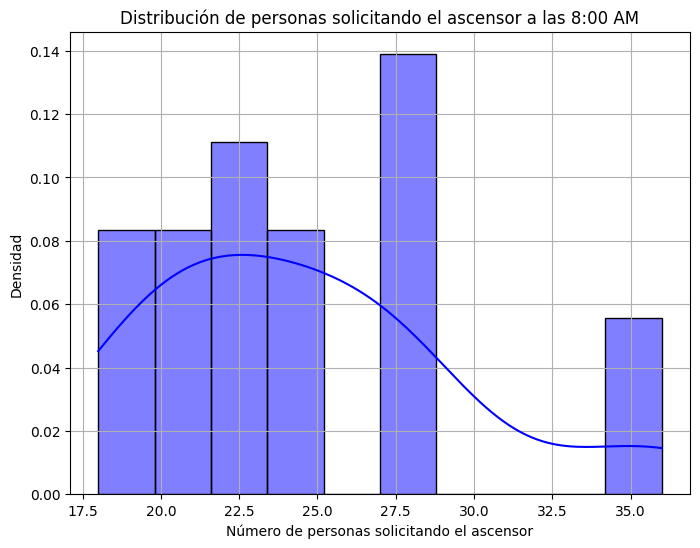

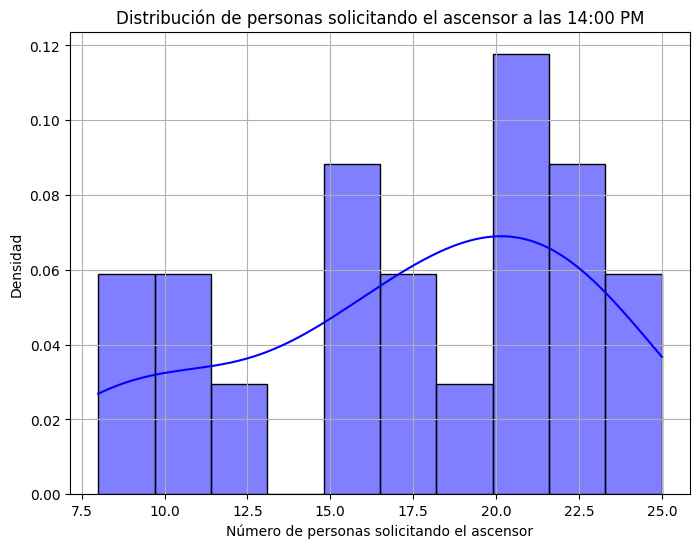

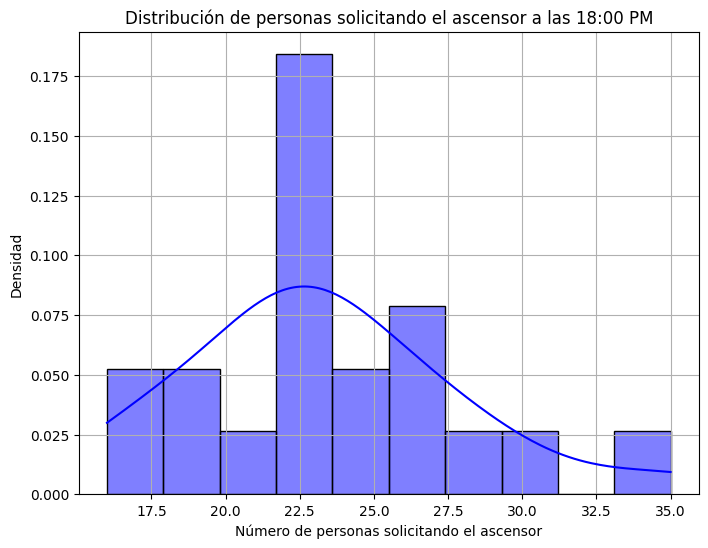

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables
NUM_PISOS = 20
NUM_EMPLEADOS_POR_PISO = 25

# Función para generar solicitudes aleatorias con distribución normal
def generar_solicitudes_distribucion_normal(hora_actual, num_pisos, num_empleados_por_piso):
    """
    Genera la distribución de personas que solicitarán el ascensor
    en función de la hora del día usando una distribución normal.

    Hora actual:
    - 8:00 -> Mayor tráfico, todos van al trabajo.
    - 14:00 -> Menor tráfico, 80% van a almorzar.
    - 18:00 -> Mayor tráfico, todos salen del trabajo.

    """
    if hora_actual == 8:
        probabilidad_viaje = 1  # El 100% de los empleados va a trabajar
    elif hora_actual == 14:
        probabilidad_viaje = 0.8  # El 80% de los empleados salen a almorzar
    elif hora_actual == 18:
        probabilidad_viaje = 1  # El 100% de los empleados sale del trabajo
    else:
        probabilidad_viaje = 0.2  # Menor tráfico en horas menos concurridas

    # Lista para almacenar el número de personas que piden el ascensor por piso
    personas_por_piso = []

    # Simulamos para cada piso cuántos empleados están pidiendo el ascensor
    for piso in range(1, num_pisos + 1):
        # Usamos distribución normal para generar el número de personas solicitando el ascensor
        empleados_viajan = int(np.random.normal(probabilidad_viaje * num_empleados_por_piso, 5))
        # Asegurarnos de no tener valores negativos
        empleados_viajan = max(0, empleados_viajan)
        personas_por_piso.append(empleados_viajan)

    return personas_por_piso

# Generar datos para diferentes horas del día
solicitudes_8am = generar_solicitudes_distribucion_normal(8, NUM_PISOS, NUM_EMPLEADOS_POR_PISO)
solicitudes_14pm = generar_solicitudes_distribucion_normal(14, NUM_PISOS, NUM_EMPLEADOS_POR_PISO)
solicitudes_18pm = generar_solicitudes_distribucion_normal(18, NUM_PISOS, NUM_EMPLEADOS_POR_PISO)

# Visualizar los datos generados con un histograma y una curva de densidad
def graficar_distribucion(solicitudes, hora):
    plt.figure(figsize=(8, 6))
    sns.histplot(solicitudes, kde=True, bins=10, color='blue', stat='density')
    plt.title(f"Distribución de personas solicitando el ascensor a las {hora}")
    plt.xlabel("Número de personas solicitando el ascensor")
    plt.ylabel("Densidad")
    plt.grid(True)
    plt.show()

# Graficar la distribución de personas solicitando el ascensor a las 8am, 14pm y 18pm
graficar_distribucion(solicitudes_8am, "8:00 AM")
graficar_distribucion(solicitudes_14pm, "14:00 PM")
graficar_distribucion(solicitudes_18pm, "18:00 PM")


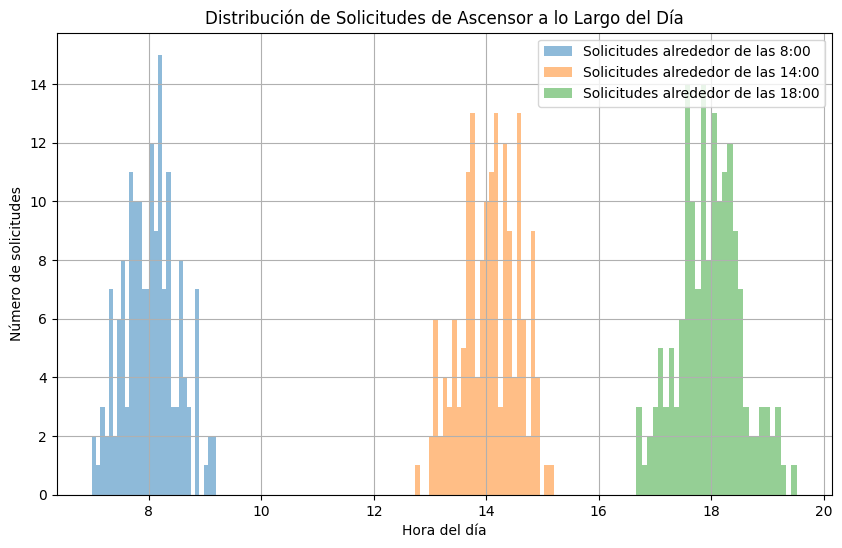

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Variables para simular distribución de solicitudes a lo largo del día
NUM_EMPLEADOS = 500  # Total de empleados en el edificio
HORAS_CLAVE = [8, 14, 18]  # Horas clave: entrada, comida, salida
DESVIACION_ESTANDAR = 0.5  # Desviación estándar para los momentos pico (en horas)

# Generar solicitudes para cada hora clave usando una distribución normal
def generar_solicitudes_hora_pico(hora_pico, num_empleados, desviacion_estandar):
    # Simulamos cuántos empleados solicitarán el ascensor alrededor de esa hora
    return np.random.normal(loc=hora_pico, scale=desviacion_estandar, size=num_empleados)

# Función para graficar la distribución de las solicitudes
def graficar_distribuciones():
    plt.figure(figsize=(10, 6))

    # Para cada hora clave (8, 14, 18), generamos una distribución normal
    for hora in HORAS_CLAVE:
        solicitudes = generar_solicitudes_hora_pico(hora, NUM_EMPLEADOS//3, DESVIACION_ESTANDAR)
        plt.hist(solicitudes, bins=30, alpha=0.5, label=f"Solicitudes alrededor de las {hora}:00")

    # Ajustes del gráfico
    plt.title('Distribución de Solicitudes de Ascensor a lo Largo del Día')
    plt.xlabel('Hora del día')
    plt.ylabel('Número de solicitudes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Ejecutar la función para generar y mostrar las gráficas
graficar_distribuciones()


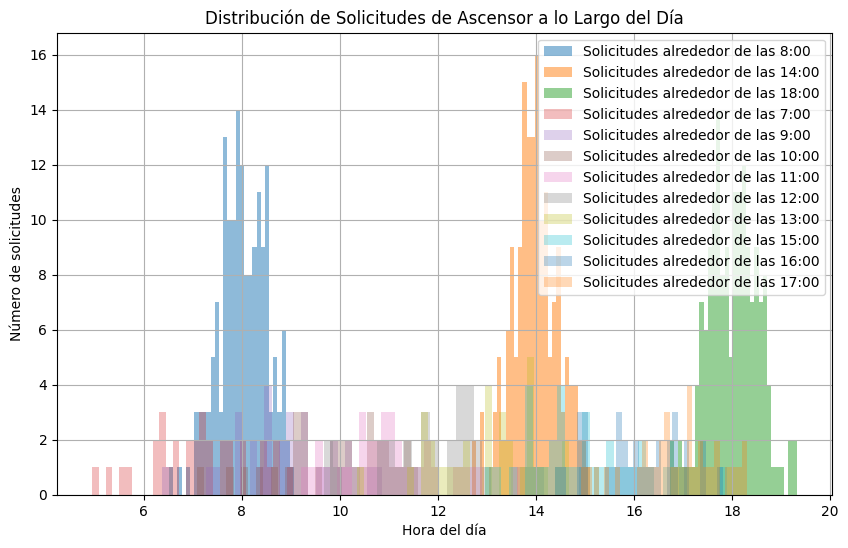

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Variables para simular distribución de solicitudes a lo largo del día
NUM_EMPLEADOS = 500  # Total de empleados en el edificio
HORAS_CLAVE = [8, 14, 18]  # Horas clave: entrada, comida, salida
HORAS_NO_CLAVE = [i for i in range(7, 19) if i not in HORAS_CLAVE]  # Horas intermedias
DESVIACION_ESTANDAR = 0.5  # Desviación estándar para las horas clave
DESVIACION_NO_CLAVE = 1.0  # Mayor dispersión para horas no clave

# Generar solicitudes para cada hora clave usando una distribución normal
def generar_solicitudes_hora_pico(hora_pico, num_empleados, desviacion_estandar):
    # Simulamos cuántos empleados solicitarán el ascensor alrededor de esa hora
    return np.random.normal(loc=hora_pico, scale=desviacion_estandar, size=num_empleados)

# Generar solicitudes para las horas no clave con menor cantidad y mayor dispersión
def generar_solicitudes_hora_no_pico(hora_no_pico, num_empleados, desviacion_estandar):
    # Generamos menos empleados en las horas no clave con mayor dispersión
    return np.random.normal(loc=hora_no_pico, scale=desviacion_estandar, size=num_empleados)

# Función para graficar la distribución de las solicitudes
def graficar_distribuciones():
    plt.figure(figsize=(10, 6))

    # Para cada hora clave (8, 14, 18), generamos una distribución normal
    for hora in HORAS_CLAVE:
        solicitudes = generar_solicitudes_hora_pico(hora, NUM_EMPLEADOS//3, DESVIACION_ESTANDAR)
        plt.hist(solicitudes, bins=30, alpha=0.5, label=f"Solicitudes alrededor de las {hora}:00")

    # Para cada hora no clave, generamos menos solicitudes y con mayor dispersión
    for hora in HORAS_NO_CLAVE:
        solicitudes = generar_solicitudes_hora_no_pico(hora, NUM_EMPLEADOS//15, DESVIACION_NO_CLAVE)
        plt.hist(solicitudes, bins=30, alpha=0.3, label=f"Solicitudes alrededor de las {hora}:00")

    # Ajustes del gráfico
    plt.title('Distribución de Solicitudes de Ascensor a lo Largo del Día')
    plt.xlabel('Hora del día')
    plt.ylabel('Número de solicitudes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Ejecutar la función para generar y mostrar las gráficas
graficar_distribuciones()

